In [1]:
!pip install folium
!pip install geopy

In [3]:
import pandas as pd
import seaborn as sb
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import plugins
from geopy.geocoders import Nominatim
import datetime
import statsmodels.api as sm

In [3]:
df = pd.read_csv('SEA.csv')
df.head()

,OBJECTID,Sample_Date,Lat_deg_,Long_deg_,Pieces_KM2,Normalized
0,1,2004-11-09,13.88,-61.71,0,0
1,2,2004-11-04,14.54,-60.61,0,0
2,5,2004-10-24,28.63,-58.22,0,0
3,6,2004-10-18,39.71,-67.97,0,0
4,9,2002-02-18,-14.74,-147.80,0,0


In [4]:
df.describe()

,OBJECTID,Lat_deg_,Long_deg_,Pieces_KM2,Normalized
count,4192.000000,4192.000000,4192.000000,4.192000e+03,4192.000000
mean,3416.257156,24.333676,-104.689711,1.459022e+04,0.000239
std,2287.866473,11.697991,38.984899,2.089899e+05,0.015445
min,1.000000,-17.140000,-177.030000,0.000000e+00,0.000000
25%,1284.750000,18.287500,-145.537500,0.000000e+00,0.000000
50%,3233.500000,24.295000,-82.070000,0.000000e+00,0.000000
75%,5412.000000,32.350000,-69.137500,2.160000e+03,0.000000
max,7755.000000,57.510000,-55.510000,1.231695e+07,1.000000


In [5]:
df.isnull().any() # dataset has no null data

OBJECTID       False
Sample_Date    False
Lat_deg_       False
Long_deg_      False
Pieces_KM2     False
Normalized     False
dtype: bool

In [6]:
figure = plt.figure(figsize=(20,7))
fig_plot = px.line(x=df["Sample_Date"],y=df["Pieces_KM2"],title="TOTAL PIECES")
fig_plot.show()
plt.show()

KeyError: 'Total_Pieces_L'

<Figure size 1440x504 with 0 Axes>

In [ ]:
DATE_2014_11_29 = df[df["Sample_Date"] == "2014-11-29"]

DATE_2014_11_29.reset_index(drop=True,inplace=True)

In [ ]:
LAT_LON_2014_11_29 = DATE_2014_11_29[["Latitude","Longitude"]]
LAT_LON_2014_11_29.reset_index(drop=True,inplace=True)

LAT_LON_2014_11_29.Latitude = LAT_LON_2014_11_29.Latitude.astype(float)
LAT_LON_2014_11_29.Longitude = LAT_LON_2014_11_29.Longitude.astype(float)

HEAT_2014_11_29 = list(zip(LAT_LON_2014_11_29.Latitude,LAT_LON_2014_11_29.Longitude))

In [ ]:
MAP_FUNCTION = folium.Map(location=[28.9637,30.2433],
                  tiles='Stamen Terrain',
                  zoom_start=2.4)

plugins.MarkerCluster(LAT_LON_2014_11_29).add_to(MAP_FUNCTION)

plugins.HeatMap(HEAT_2014_11_29).add_to(MAP_FUNCTION)

MAP_FUNCTION

In [ ]:
ADVENTURE_LAT_LON = df[["Latitude","Longitude"]]
ADVENTURE_LAT_LON.reset_index(drop=True,inplace=True)
ADVENTURE_LAT_LON.Latitude = ADVENTURE_LAT_LON.Latitude.astype(float)
ADVENTURE_LAT_LON.Longitude = ADVENTURE_LAT_LON.Longitude.astype(float)

In [ ]:
HEAT_LAT_LON_ADVENTURE = list(zip(ADVENTURE_LAT_LON.Latitude,ADVENTURE_LAT_LON.Longitude))

In [ ]:
MAP_FUNCTION = folium.Map(location=[28.9637,30.2433],
                  tiles='Stamen Terrain',
                  zoom_start=2.4)

plugins.MarkerCluster(ADVENTURE_LAT_LON).add_to(MAP_FUNCTION)

plugins.HeatMap(HEAT_LAT_LON_ADVENTURE).add_to(MAP_FUNCTION)

MAP_FUNCTION

In [ ]:
figure_2014_11_29 = px.density_mapbox(ADVENTURE_LAT_LON, lat=ADVENTURE_LAT_LON.Latitude, lon=ADVENTURE_LAT_LON.Longitude, radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
figure_2014_11_29.show()

In [10]:
new_df = df.copy()


# initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")


In [ ]:
Latitude = new_df['Latitude'][0]
Longitude = new_df['Longitude'][0]

print(Latitude)
print(Longitude)

In [ ]:
country.raw['address']['country']

In [11]:
countryArr = []
for index, row in df.iterrows():
    Latitude = row['Lat_deg_']
    Longitude = row['Long_deg_']
    countryHash = geolocator.reverse(str(Latitude)+","+str(Longitude))
    if countryHash is not None:
        try:
            country = countryHash.raw['address']['country']
            countryArr.append(country)
        except:
            countryArr.append(None)
    else:
        countryArr.append(None)

In [12]:
countryArr

[None,
 None,
 None,
 None,
 'France',
 None,
 'Venezuela',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Cuba',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'United States',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 No

In [13]:
new_df["Country"] = countryArr
new_df

,OBJECTID,Sample_Date,Lat_deg_,Long_deg_,Pieces_KM2,Normalized,Country
0,1,2004-11-09,13.88,-61.71,0,0,None
1,2,2004-11-04,14.54,-60.61,0,0,None
2,5,2004-10-24,28.63,-58.22,0,0,None
3,6,2004-10-18,39.71,-67.97,0,0,None
4,9,2002-02-18,-14.74,-147.80,0,0,France
...,...,...,...,...,...,...,...
4187,7751,2002-07-12,57.14,-134.05,0,0,United States
4188,7752,2002-07-13,57.22,-136.23,0,0,None
4189,7753,2002-07-13,57.30,-136.21,0,0,United States
4190,7754,2002-07-11,57.46,-133.77,0,0,United States


In [14]:
yearArr = []
for index, row in df.iterrows():
    year = df['Sample_Date'][index][0:4]
    yearArr.append(year)
    
len(yearArr)

4192

In [15]:
new_df['Year'] = yearArr
new_df

,OBJECTID,Sample_Date,Lat_deg_,Long_deg_,Pieces_KM2,Normalized,Country,Year
0,1,2004-11-09,13.88,-61.71,0,0,None,2004
1,2,2004-11-04,14.54,-60.61,0,0,None,2004
2,5,2004-10-24,28.63,-58.22,0,0,None,2004
3,6,2004-10-18,39.71,-67.97,0,0,None,2004
4,9,2002-02-18,-14.74,-147.80,0,0,France,2002
...,...,...,...,...,...,...,...,...
4187,7751,2002-07-12,57.14,-134.05,0,0,United States,2002
4188,7752,2002-07-13,57.22,-136.23,0,0,None,2002
4189,7753,2002-07-13,57.30,-136.21,0,0,United States,2002
4190,7754,2002-07-11,57.46,-133.77,0,0,United States,2002


In [16]:
new_df.dropna()

,OBJECTID,Sample_Date,Lat_deg_,Long_deg_,Pieces_KM2,Normalized,Country,Year
4,9,2002-02-18,-14.74,-147.80,0,0,France,2002
6,16,2000-12-08,11.32,-67.08,0,0,Venezuela,2000
14,140,2001-02-21,19.82,-75.51,0,0,Cuba,2001
24,250,2001-07-23,42.22,-70.26,0,0,United States,2001
981,1218,2004-04-20,19.95,-156.16,0,0,United States,2004
...,...,...,...,...,...,...,...,...
4186,7750,2002-07-14,56.88,-136.10,0,0,United States,2002
4187,7751,2002-07-12,57.14,-134.05,0,0,United States,2002
4189,7753,2002-07-13,57.30,-136.21,0,0,United States,2002
4190,7754,2002-07-11,57.46,-133.77,0,0,United States,2002


### PROBLEM : THE GEOLOCATION FUNCTION IDENTIFIES ALOT OF THE POINTS IN THE WATER AS 'NONE', HENCE MORE THAN 700 POINTS ARE BEING REMOVED

In [17]:
new_df.Country.unique()

array([None, 'France', 'Venezuela', 'Cuba', 'United States',
       'Saint Vincent and the Grenadines', 'Ecuador', 'Costa Rica',
       'Grenada', 'Nederland', 'Saint Lucia', 'Honduras', 'Jamaica',
       'Montserrat', 'Antigua and Barbuda', 'Saint Kitts and Nevis',
       'British Virgin Islands', 'República Dominicana', 'Cayman Islands',
       'Ayiti', 'The Bahamas', 'Turks and Caicos Islands', 'México',
       'Bermuda', 'Canada'], dtype=object)

In [18]:
country_df = new_df.groupby(['Year','Country']).sum()

In [19]:
country_df

OBJECTID  Lat_deg_  Long_deg_  Pieces_KM2  \
Year Country                                                          
2000 Antigua and Barbuda      2890     16.97     -61.91        5940   
     Bermuda                 18053     96.65    -194.02       48056   
     Canada                   7661     44.27     -64.03           0   
     Jamaica                 14912     86.08    -385.90        1620   
     Nederland                5297     30.20    -131.64       21598   
...                            ...       ...        ...         ...   
2008 United States           69260    423.21   -1126.72       10639   
2009 United States            3687     59.85    -468.48           0   
2010 United States            1231     19.95    -156.16           0   
2011 United States            3699     59.85    -468.48           0   
2012 United States            8408     59.85    -468.48      193689   

                          Normalized  
Year Country                          
2000 Antigua and Barbuda           0  
     Bermuda                       0  
     Canada                        0  
     Jamaica                       0  
     Nederland                     0  
...                              ...  
2008 United States                 0  
2009 United States                 0  
2010 United States                 0  
2011 United States                 0  
2012 United States                 0  

[88 rows x 5 columns]

In [20]:
new_df[new_df['Country'] == 'United States'].groupby(['Year']).sum()

,OBJECTID,Lat_deg_,Long_deg_,Pieces_KM2,Normalized
Year,,,,,
2000,100513,564.54,-1408.66,42796,0
2001,65257,414.12,-904.89,26648,0
2002,262183,1596.52,-3822.15,15753,0
2003,69411,384.68,-1836.70,44960,0
2004,88138,527.06,-1365.30,10094,0
2005,74024,465.57,-1181.20,66823,0
2006,55512,329.09,-832.34,9957,0
2007,40605,258.71,-755.28,2577,0
2008,69260,423.21,-1126.72,10639,0


In [22]:
a = new_df.groupby(["Year"]).mean()
a['Pieces_KM2']

Year
2000     10294.518605
2001      6937.008547
2002      5843.756757
2003      4603.909308
2004      7155.614973
2005      6096.226601
2006      1897.951673
2007      4630.841808
2008       995.652997
2009         0.000000
2010         0.000000
2011         0.000000
2012    150358.530909
Name: Pieces_KM2, dtype: float64

In [37]:
b = a.drop(['2009','2010','2011','2012'])

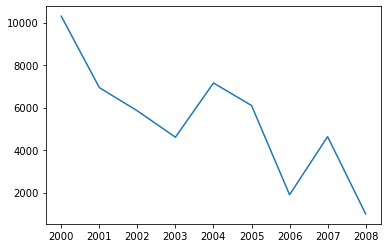

In [38]:
plt.plot(b['Pieces_KM2'])

In [123]:
mpp = pd.read_csv('CCR.csv')
mpp.head()

,Label,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"USA, males*",67.8,65.9,62.6,60.9,59.6,58.3,60.0,57.9,58.7
1,"USA, females*",49.5,48.8,47.2,45.8,44.8,43.4,45.1,44.6,46.0


In [124]:
mpp = mpp.T
mpp

,0,1
Label,"USA, males*","USA, females*"
2008,67.8,49.5
2009,65.9,48.8
2010,62.6,47.2
2011,60.9,45.8
2012,59.6,44.8
2013,58.3,43.4
2014,60.0,45.1
2015,57.9,44.6
2016,58.7,46.0


In [125]:
mpp.columns = mpp.iloc[0]
mpp

Label,"USA, males*","USA, females*"
Label,"USA, males*","USA, females*"
2008,67.8,49.5
2009,65.9,48.8
2010,62.6,47.2
2011,60.9,45.8
2012,59.6,44.8
2013,58.3,43.4
2014,60.0,45.1
2015,57.9,44.6
2016,58.7,46.0


In [126]:
mpp = mpp.drop("Label")

In [127]:
mpp["USA"] = mpp["USA, males*"] + mpp["USA, females*"]

In [128]:
mpp = mpp.drop(columns=["USA, males*", "USA, females*"])

In [129]:
b

,OBJECTID,Lat_deg_,Long_deg_,Pieces_KM2,Normalized
Year,,,,,
2000,4516.844186,25.604349,-69.524930,10294.518605,0.0
2001,4451.348291,23.645726,-77.064765,6937.008547,0.0
2002,4563.493243,23.933581,-99.544392,5843.756757,0.0
2003,3419.634845,21.471623,-111.819021,4603.909308,0.0
2004,2925.622995,24.674278,-112.111497,7155.614973,0.0
2005,3524.453202,27.115172,-98.720862,6096.226601,0.0
2006,3365.665428,26.257398,-99.848067,1897.951673,0.0
2007,3656.793785,25.579746,-91.662119,4630.841808,0.0
2008,2989.706625,26.763123,-110.853975,995.652997,0.0


In [130]:
final_df = pd.concat([b,mpp], axis = 1)
final_df = final_df.drop(columns = ['OBJECTID','Lat_deg_','Long_deg_','Normalized'])

In [131]:
final_df

,Pieces_KM2,USA
2000,10294.518605,NaN
2001,6937.008547,NaN
2002,5843.756757,NaN
2003,4603.909308,NaN
2004,7155.614973,NaN
2005,6096.226601,NaN
2006,1897.951673,NaN
2007,4630.841808,NaN
2008,995.652997,117.3
2009,NaN,114.7


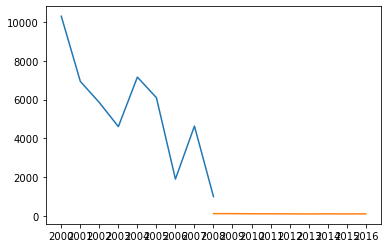

In [132]:
plt.plot(final_df)

Text(0, 0.5, 'MPP')

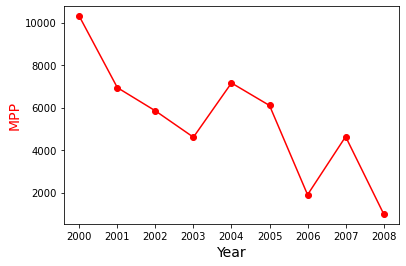

In [133]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(final_df.index, final_df.Pieces_KM2, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("MPP",color="red",fontsize=14)

In [136]:
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(final_df.index, final_df.USA,color="blue",marker="o")
ax2.set_ylabel("Cancer",color="blue",fontsize=14)
x = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
ax2.set_xticklabels(x,rotation=90)
plt.show()
# save the plot as a file
fig.savefig('mpp_w_ccr.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

/var/folders/04/7d_q61995kb_fww813kkkh9r0000gn/T/ipykernel_33107/4023810772.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x,rotation=90)


In [189]:
X = b['Pieces_KM2']
X = X.reset_index().drop(columns='Year')

y = mpp['USA']*3000
y = y.reset_index().drop(columns = 'index')
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    USA   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     4.421
Date:                Fri, 25 Feb 2022   Prob (F-statistic):             0.0736
Time:                        19:34:25   Log-Likelihood:                -97.317
No. Observations:                   9   AIC:                             198.6
Df Residuals:                       7   BIC:                             199.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.029e+05   1.03e+04     29.402      0.0

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [195]:
import seaborn as sns

<AxesSubplot:xlabel='Pieces_KM2', ylabel='USA'>

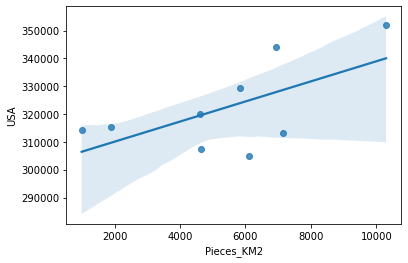

In [196]:
sns.regplot(x=X, y=y)

In [197]:
X = b['Pieces_KM2']
X = X.reset_index().drop(columns='Year')

y = mpp['USA']*3000
y = y.reset_index().drop(columns = 'index')
y = y.astype(float)

model_df = pd.concat([X,y], axis = 1)
model_df

,Pieces_KM2,USA
0,10294.518605,351900.0
1,6937.008547,344100.0
2,5843.756757,329400.0
3,4603.909308,320100.0
4,7155.614973,313200.0
5,6096.226601,305100.0
6,1897.951673,315300.0
7,4630.841808,307500.0
8,995.652997,314100.0


In [1]:
model_df.corr()

NameError: name 'model_df' is not defined

In [7]:
sperm = pd.read_excel('sperm.xlsx')
sperm.head()

,Year,n,25thSC,50thSC,75thSC,25thTSC,50thTSC,75thTSC,25thPM,50thPM,75thPM,25thTM,50thTM,75thTM
0,2009,907,40,62,77,100.0,160,225.0,40.00,54,64,48,60,69
1,2010,408,40,60,74,104.5,157,219.0,45.25,60,65,50,65,70
2,2011,981,39,56,73,80.0,150,210.0,40.00,50,65,45,60,70
3,2012,751,30,53,72,80.0,138,195.0,40.00,50,65,45,60,70
4,2013,3258,31,51,68,75.0,126,200.0,35.00,50,65,45,60,70


Text(0, 0.5, 'Sperm Concentration (million/mL)')

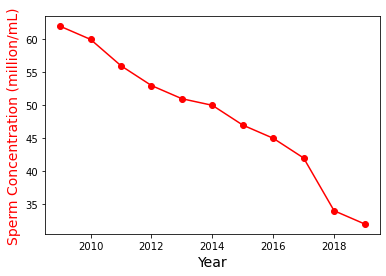

In [9]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(sperm.Year, sperm["50thSC"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Sperm Concentration (million/mL)",color="red",fontsize=14)